# Import Libraries

In [1]:

################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Step 1 - Import and Checking Data

In [29]:
#First we import the data
wine=pd.read_csv(r"C:\Users\Digambar\OneDrive\Desktop\Imarticus Learing\Machine Learning\Supervised Machie Learning\Linear Regressio\wine.csv")
wine

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


If data is not present in Quantative variable then covert in to numerical format

# Step 2 - Identify X & Y

### Data type 

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [4]:
wine.describe()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Step 3 - Data Preprocessing 

### Checking Missing value 

In [5]:
wine.isnull().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

### Identify and treatement the outlier 

<AxesSubplot:>

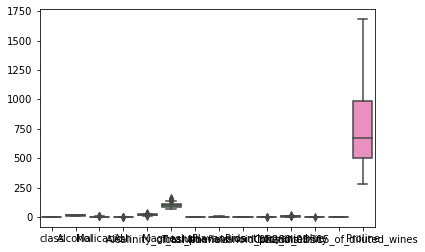

In [6]:
sns.boxplot(data=wine)

<AxesSubplot:ylabel='class'>

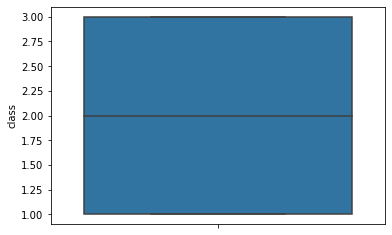

In [8]:
sns.boxplot(y='class',data=wine)

<AxesSubplot:ylabel='Alcohol'>

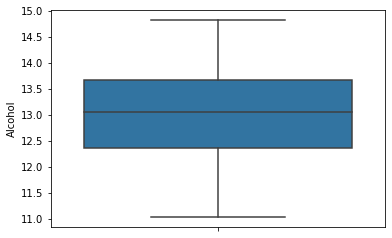

In [9]:
sns.boxplot(y='Alcohol',data=wine)

<AxesSubplot:ylabel='Malicacid'>

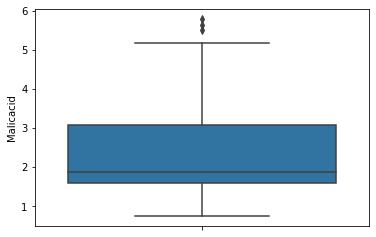

In [10]:
sns.boxplot(y='Malicacid',data=wine)

In [12]:
q1 = wine['Malicacid'].quantile(0.25)
q3 = wine['Malicacid'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

5.3025

In [13]:
wine['Malicacid']=np.where(wine['Malicacid'] > upper_limit,upper_limit,wine['Malicacid']) # upper limit

<AxesSubplot:ylabel='Malicacid'>

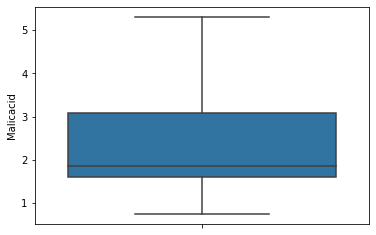

In [14]:
sns.boxplot(y='Malicacid',data=wine)

<AxesSubplot:ylabel='Ash'>

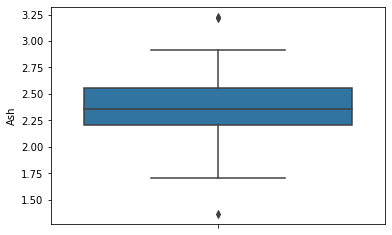

In [30]:
sns.boxplot(y='Ash',data=wine)

In [31]:
q1 = wine['Ash'].quantile(0.25)
q3 = wine['Ash'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

3.0787500000000003

In [34]:
q1 = wine['Ash'].quantile(0.25)
q3 = wine['Ash'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q3-1.5*iqr 
lower_limit

2.03625

In [32]:
wine['Ash']=np.where(wine['Ash'] > upper_limit,upper_limit,wine['Ash']) # upper limit

In [35]:
wine['Ash']=np.where(wine['Ash'] < lower_limit,lower_limit,wine['Ash']) # upper limit

<AxesSubplot:ylabel='Ash'>

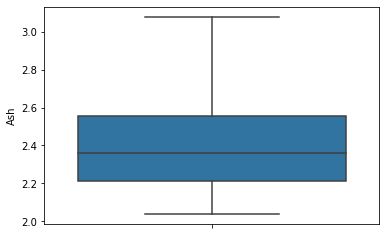

In [36]:
sns.boxplot(y='Ash',data=wine)

<AxesSubplot:ylabel='Alcalinity_of_ash'>

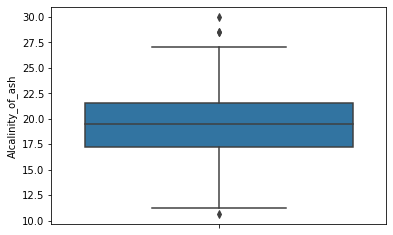

In [37]:
sns.boxplot(y='Alcalinity_of_ash',data=wine)

In [38]:
q1 = wine['Alcalinity_of_ash'].quantile(0.25)
q3 = wine['Alcalinity_of_ash'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

27.950000000000003

In [43]:
q1 = wine['Alcalinity_of_ash'].quantile(0.25)
q3 = wine['Alcalinity_of_ash'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q3-1.5*iqr 
lower_limit

15.049999999999999

In [44]:
wine['Alcalinity_of_ash']=np.where(wine['Alcalinity_of_ash'] > upper_limit,upper_limit,wine['Alcalinity_of_ash']) # upper limit

In [45]:
wine['Alcalinity_of_ash']=np.where(wine['Alcalinity_of_ash'] < lower_limit,lower_limit,wine['Alcalinity_of_ash']) # upper limit

<AxesSubplot:ylabel='Alcalinity_of_ash'>

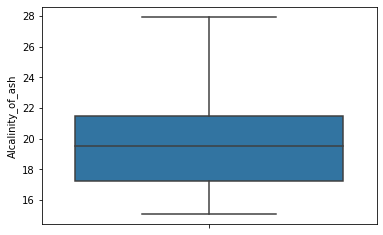

In [47]:
sns.boxplot(y='Alcalinity_of_ash',data=wine)

<AxesSubplot:ylabel='Magnesium'>

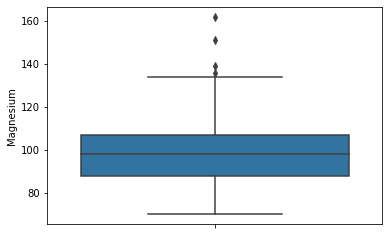

In [48]:
sns.boxplot(y='Magnesium',data=wine)

In [49]:
q1 = wine['Magnesium'].quantile(0.25)
q3 = wine['Magnesium'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

135.5

In [50]:
wine['Magnesium']=np.where(wine['Magnesium'] > upper_limit,upper_limit,wine['Magnesium']) # upper limit

<AxesSubplot:ylabel='Magnesium'>

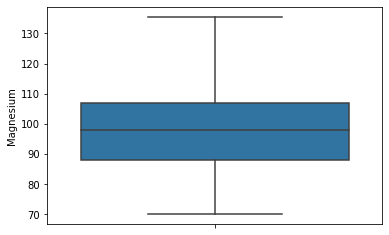

In [51]:
sns.boxplot(y='Magnesium',data=wine)

<AxesSubplot:ylabel='Total_phenols'>

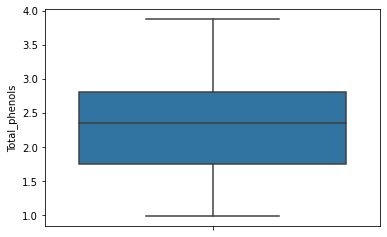

In [52]:
sns.boxplot(y='Total_phenols',data=wine)

<AxesSubplot:ylabel='Flavanoids'>

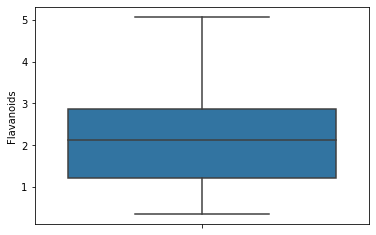

In [53]:
sns.boxplot(y='Flavanoids',data=wine)

<AxesSubplot:ylabel='Nonflavanoid_phenols'>

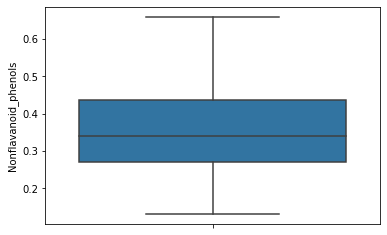

In [54]:
sns.boxplot(y='Nonflavanoid_phenols',data=wine)

<AxesSubplot:ylabel='Proanthocyanins'>

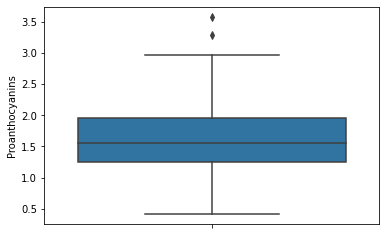

In [55]:
sns.boxplot(y='Proanthocyanins',data=wine)

In [56]:
q1 = wine['Proanthocyanins'].quantile(0.25)
q3 = wine['Proanthocyanins'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

3.0

In [57]:
wine['Proanthocyanins']=np.where(wine['Proanthocyanins'] > upper_limit,upper_limit,wine['Proanthocyanins']) # upper limit

<AxesSubplot:ylabel='Proanthocyanins'>

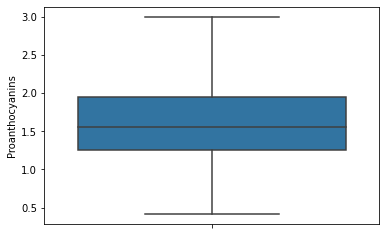

In [58]:
sns.boxplot(y='Proanthocyanins',data=wine)

<AxesSubplot:ylabel='Color_intensity'>

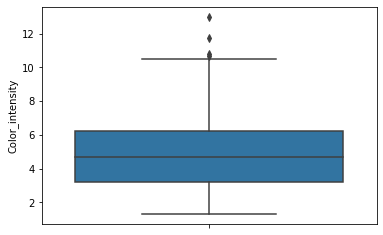

In [59]:
sns.boxplot(y='Color_intensity',data=wine)

In [60]:
q1 = wine['Color_intensity'].quantile(0.25)
q3 = wine['Color_intensity'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

10.670000000000002

In [61]:
wine['Color_intensity']=np.where(wine['Color_intensity'] > upper_limit,upper_limit,wine['Color_intensity']) # upper limit

<AxesSubplot:ylabel='Color_intensity'>

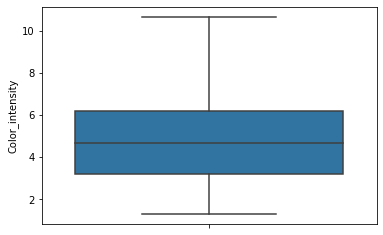

In [62]:
sns.boxplot(y='Color_intensity',data=wine)

<AxesSubplot:ylabel='Hue'>

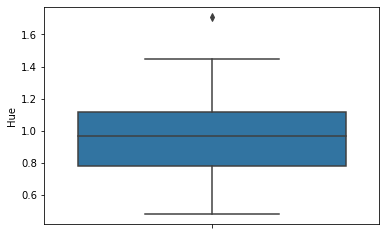

In [63]:
sns.boxplot(y='Hue',data=wine)

In [67]:
q1 = wine['Hue'].quantile(0.25)
q3 = wine['Hue'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

1.6262500000000002

In [68]:
wine['Hue']=np.where(wine['Hue'] > upper_limit,upper_limit,wine['Hue']) # upper limit

<AxesSubplot:ylabel='Hue'>

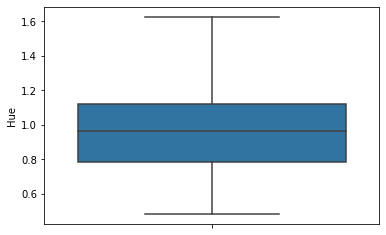

In [69]:
sns.boxplot(y='Hue',data=wine)

<AxesSubplot:ylabel='0D280_0D315_of_diluted_wines'>

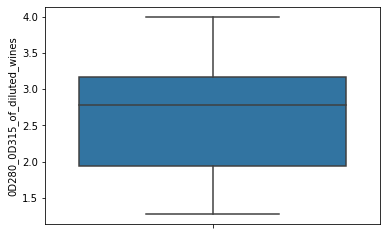

In [70]:
sns.boxplot(y='0D280_0D315_of_diluted_wines',data=wine)

<AxesSubplot:ylabel='Proline'>

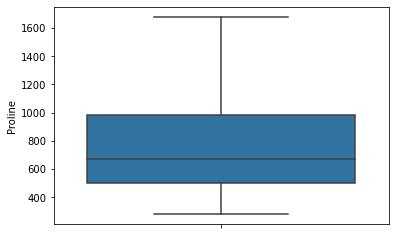

In [71]:
sns.boxplot(y='Proline',data=wine)

# Step 4 - Splitting Datapart's 

* Splitting the data into two parts Train and test
* 70 % in the train and 30 % in the test

In [75]:
# Putting feature variable to X
X = wine.drop('Proline', axis= 1)

# Putting response variable to y
y = wine[['Proline']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=180)

In [76]:
wine.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.60,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,15.05,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.60,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.80,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.00,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Step 5 - Correlation 

### Coorelation Matrix

In [142]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Proline,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines
102,438,2,12.34,2.45,2.46000,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38
54,1060,1,13.74,1.67,2.25000,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20
100,710,2,12.08,2.08,2.03625,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96
4,735,1,13.24,2.59,2.87000,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93
141,780,3,13.36,2.56,2.35000,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47


#### Scatter Plot ( Bi-variate Analysis) 

In [143]:
df.corr()

,Proline,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines
Proline,1.000000,-0.596614,0.651121,-0.162156,0.192429,-0.413816,0.463402,0.457952,0.428726,-0.228029,0.306638,0.338372,0.201022,0.254146
class,-0.596614,1.000000,-0.343840,0.399145,-0.103867,0.444416,-0.239648,-0.707622,-0.816604,0.461882,-0.539357,0.295956,-0.612176,-0.770179
Alcohol,0.651121,-0.343840,1.000000,0.080182,0.102714,-0.347209,0.261090,0.288527,0.229481,-0.133197,0.130933,0.512708,-0.022911,0.057451
Malicacid,-0.162156,0.399145,0.080182,1.000000,0.121648,0.282420,-0.004395,-0.290253,-0.351006,0.243864,-0.167943,0.302342,-0.596432,-0.334080
Ash,0.192429,-0.103867,0.102714,0.121648,1.000000,0.451100,0.366798,0.148532,0.143600,0.228817,0.014674,0.155931,0.054779,0.057306
Alcalinity_of_ash,-0.413816,0.444416,-0.347209,0.282420,0.451100,1.000000,-0.047085,-0.245638,-0.257081,0.368519,-0.147769,-0.037208,-0.194117,-0.163386
Magnesium,0.463402,-0.239648,0.261090,-0.004395,0.366798,-0.047085,1.000000,0.251560,0.222971,-0.242795,0.233098,0.204045,0.098731,0.097816
Total_phenols,0.457952,-0.707622,0.288527,-0.290253,0.148532,-0.245638,0.251560,1.000000,0.871586,-0.412514,0.640500,-0.086341,0.421319,0.705804
Flavanoids,0.428726,-0.816604,0.229481,-0.351006,0.143600,-0.257081,0.222971,0.871586,1.000000,-0.487871,0.675222,-0.193432,0.525371,0.779926
Nonflavanoid_phenols,-0.228029,0.461882,-0.133197,0.243864,0.228817,0.368519,-0.242795,-0.412514,-0.487871,1.000000,-0.370379,0.204748,-0.301201,-0.482020


<AxesSubplot:>

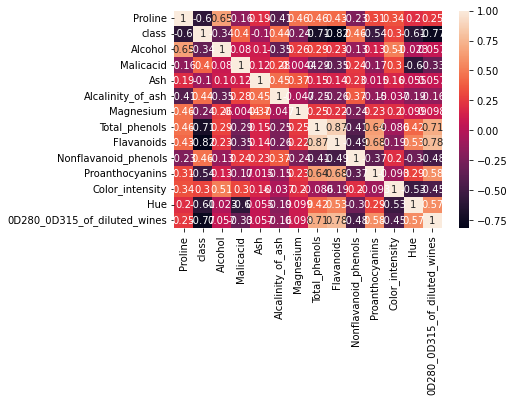

In [144]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Proline vs class'}, xlabel='class', ylabel='Proline'>

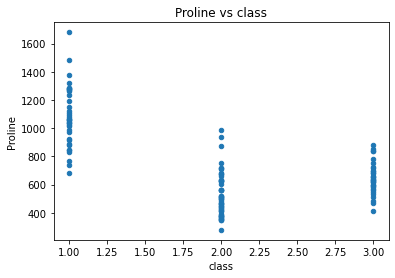

In [145]:
df.plot.scatter(x='class', y='Proline', title='Proline vs class')

<AxesSubplot:title={'center':'Proline vs Alcohol'}, xlabel='Alcohol', ylabel='Proline'>

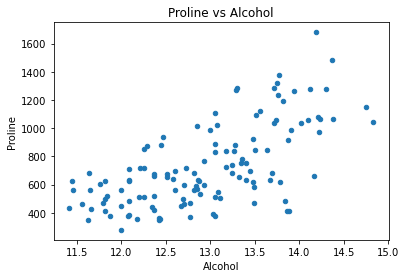

In [146]:
df.plot.scatter(x='Alcohol', y='Proline', title='Proline vs Alcohol')

<AxesSubplot:title={'center':'Proline vs Malicacid'}, xlabel='Malicacid', ylabel='Proline'>

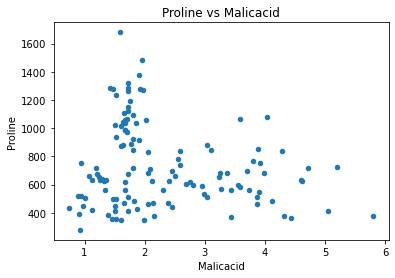

In [147]:
df.plot.scatter(x='Malicacid', y='Proline', title='Proline vs Malicacid')

<AxesSubplot:title={'center':'Proline vs Ash'}, xlabel='Ash', ylabel='Proline'>

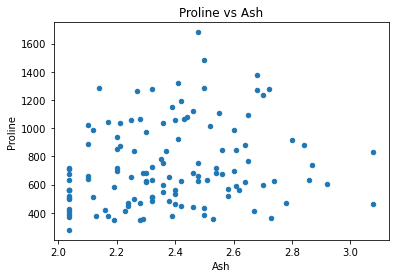

In [148]:
df.plot.scatter(x='Ash', y='Proline', title='Proline vs Ash')

<AxesSubplot:title={'center':'Proline vs Alcalinity_of_ash'}, xlabel='Alcalinity_of_ash', ylabel='Proline'>

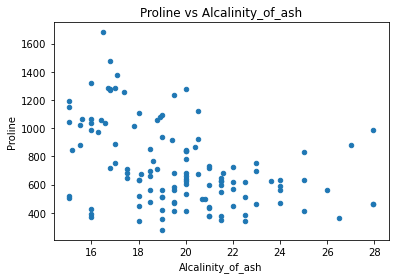

In [149]:
df.plot.scatter(x='Alcalinity_of_ash', y='Proline', title='Proline vs Alcalinity_of_ash')

<AxesSubplot:title={'center':'Proline vs Magnesium'}, xlabel='Magnesium', ylabel='Proline'>

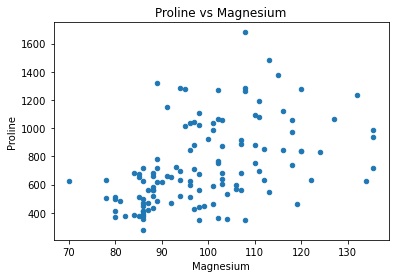

In [150]:
df.plot.scatter(x='Magnesium', y='Proline', title='Proline vs Magnesium')

<AxesSubplot:title={'center':'Proline vs Total_phenols'}, xlabel='Total_phenols', ylabel='Proline'>

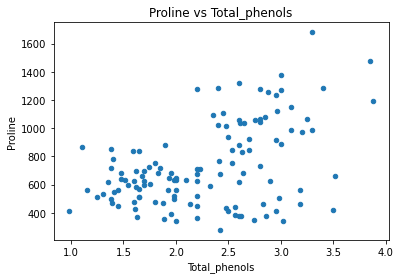

In [151]:
df.plot.scatter(x='Total_phenols', y='Proline', title='Proline vs Total_phenols')

<AxesSubplot:title={'center':'Proline vs Flavanoids'}, xlabel='Flavanoids', ylabel='Proline'>

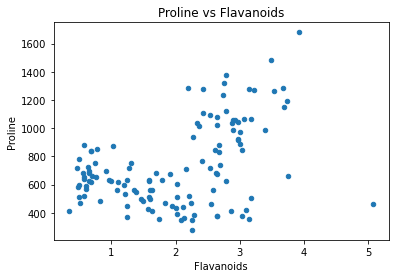

In [152]:
df.plot.scatter(x='Flavanoids', y='Proline', title='Proline vs Flavanoids')

<AxesSubplot:title={'center':'Proline vs Nonflavanoid_phenols'}, xlabel='Nonflavanoid_phenols', ylabel='Proline'>

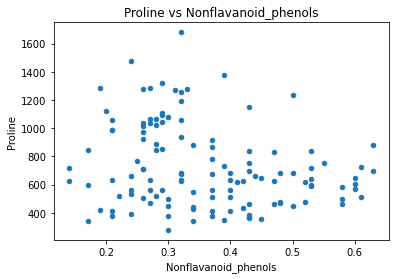

In [153]:
df.plot.scatter(x='Nonflavanoid_phenols', y='Proline', title='Proline vs Nonflavanoid_phenols')

<AxesSubplot:title={'center':'Proline vs Proanthocyanins'}, xlabel='Proanthocyanins', ylabel='Proline'>

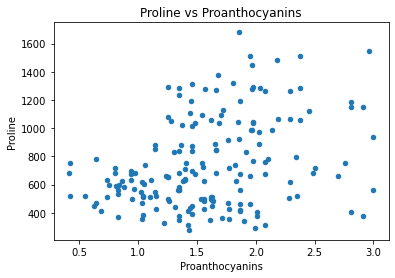

In [104]:
wine.plot.scatter(x='Proanthocyanins', y='Proline', title='Proline vs Proanthocyanins')

<AxesSubplot:title={'center':'Proline vs Color_intensity'}, xlabel='Color_intensity', ylabel='Proline'>

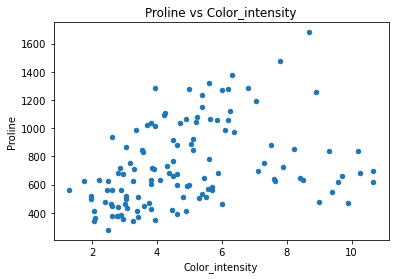

In [154]:
df.plot.scatter(x='Color_intensity', y='Proline', title='Proline vs Color_intensity')

<AxesSubplot:title={'center':'Proline vs Hue'}, xlabel='Hue', ylabel='Proline'>

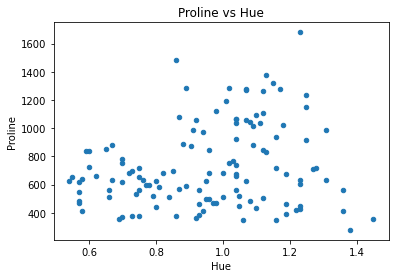

In [155]:
df.plot.scatter(x='Hue', y='Proline', title='Proline vs Hue')

<AxesSubplot:title={'center':'Proline vs 0D280_0D315_of_diluted_wines'}, xlabel='0D280_0D315_of_diluted_wines', ylabel='Proline'>

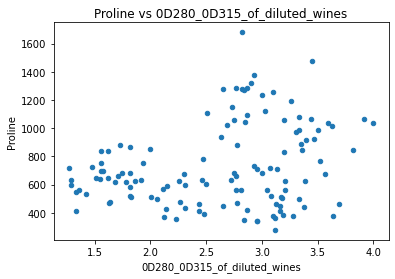

In [156]:
df.plot.scatter(x='0D280_0D315_of_diluted_wines', y='Proline', title='Proline vs 0D280_0D315_of_diluted_wines')

<AxesSubplot:title={'center':'Proline vs Total_phenols'}, xlabel='Total_phenols', ylabel='Proline'>

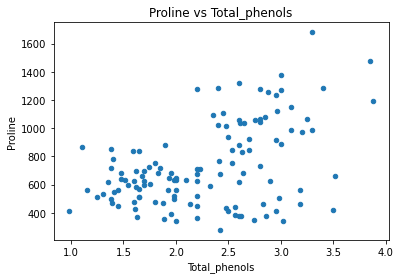

In [157]:
df.plot.scatter(x='Total_phenols', y='Proline', title='Proline vs Total_phenols')

# Step 6 - Collinearity

<AxesSubplot:title={'center':'Magnesium vs Alcohol'}, xlabel='Magnesium', ylabel='Alcohol'>

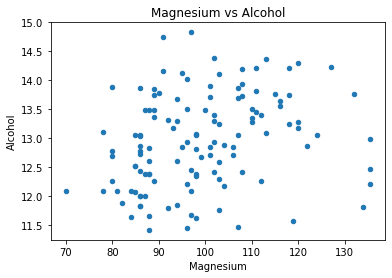

In [158]:
df.plot.scatter(x='Magnesium', y='Alcohol', title='Magnesium vs Alcohol')

# Step 7 - Multicolinearity (with the help of VIF)


In [159]:
X1=df.drop(['Proline'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                            30.390563
Alcohol                         201.903892
Malicacid                         9.411574
Ash                             213.634973
Alcalinity_of_ash               112.034431
Magnesium                        78.955158
Total_phenols                    63.453376
Flavanoids                       37.682689
Nonflavanoid_phenols             17.337203
Proanthocyanins                  19.826197
Color_intensity                  15.602560
Hue                              53.127883
0D280_0D315_of_diluted_wines     57.431525
dtype: float64

* After looking the above data we say the both column VIF > 10 so it is multi-collinearity is exist

# Step 8 - Variance Inflaction Factor (VIF) 

In [160]:
X1=df.drop(['Proline','Alcohol'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                            28.062155
Malicacid                         8.720698
Ash                             202.998490
Alcalinity_of_ash               109.265478
Magnesium                        75.057854
Total_phenols                    62.497002
Flavanoids                       37.420682
Nonflavanoid_phenols             17.136543
Proanthocyanins                  19.823617
Color_intensity                  11.766896
Hue                              42.626702
0D280_0D315_of_diluted_wines     50.694583
dtype: float64

In [161]:
X1=df.drop(['Proline','Alcohol','Ash'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                           27.603186
Malicacid                        8.506159
Alcalinity_of_ash               77.933876
Magnesium                       57.199842
Total_phenols                   62.248049
Flavanoids                      37.158987
Nonflavanoid_phenols            15.097369
Proanthocyanins                 19.036292
Color_intensity                 10.811323
Hue                             39.727008
0D280_0D315_of_diluted_wines    50.240392
dtype: float64

In [162]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                           17.208256
Malicacid                        8.238299
Magnesium                       53.907052
Total_phenols                   61.719695
Flavanoids                      35.755982
Nonflavanoid_phenols            13.014885
Proanthocyanins                 19.036191
Color_intensity                 10.459012
Hue                             39.598154
0D280_0D315_of_diluted_wines    46.321651
dtype: float64

In [163]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash','Total_phenols'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                           17.004995
Malicacid                        8.231949
Magnesium                       52.946368
Flavanoids                      23.106769
Nonflavanoid_phenols            12.919763
Proanthocyanins                 18.831872
Color_intensity                 10.018866
Hue                             39.590271
0D280_0D315_of_diluted_wines    43.400557
dtype: float64

In [164]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash','Total_phenols','Magnesium'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                           16.156159
Malicacid                        7.738644
Flavanoids                      23.100909
Nonflavanoid_phenols            12.853847
Proanthocyanins                 18.416707
Color_intensity                  7.895014
Hue                             30.404892
0D280_0D315_of_diluted_wines    42.398380
dtype: float64

In [165]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash','Total_phenols','Magnesium','0D280_0D315_of_diluted_wines'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                   16.043849
Malicacid                7.158300
Flavanoids              18.012648
Nonflavanoid_phenols    12.851090
Proanthocyanins         17.413002
Color_intensity          7.525617
Hue                     22.210004
dtype: float64

In [166]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash','Total_phenols','Magnesium','0D280_0D315_of_diluted_wines','Hue'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

class                   12.840852
Malicacid                6.771273
Flavanoids              11.302744
Nonflavanoid_phenols    11.162011
Proanthocyanins         17.057995
Color_intensity          6.918627
dtype: float64

In [167]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash','Total_phenols','Magnesium','0D280_0D315_of_diluted_wines','Hue','class'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Malicacid                6.061021
Flavanoids               9.733801
Nonflavanoid_phenols     7.211062
Proanthocyanins         15.935768
Color_intensity          6.328845
dtype: float64

In [168]:
X1=df.drop(['Proline','Alcohol','Ash','Alcalinity_of_ash','Total_phenols','Magnesium','0D280_0D315_of_diluted_wines','Hue','class','Proanthocyanins'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Malicacid               5.753240
Flavanoids              2.783179
Nonflavanoid_phenols    6.835067
Color_intensity         6.231572
dtype: float64

In [169]:
df.head()

,Proline,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines
102,438,2,12.34,2.45,2.46000,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38
54,1060,1,13.74,1.67,2.25000,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20
100,710,2,12.08,2.08,2.03625,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96
4,735,1,13.24,2.59,2.87000,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93
141,780,3,13.36,2.56,2.35000,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47


# Step 9 - Model Building

### Hypothesis 

* H0 :- There is no correlation between Proline and Alcohol, Ash, Alcalinity_of_ash,Total_phenols, Magnesium, 0D280_0D315_of_diluted_wines, Hue, class, Proanthocyanins <br>
vs <br>
* H1 :- There is correlation between Proline and Alcohol, Ash, Alcalinity_of_ash,Total_phenols, Magnesium, 0D280_0D315_of_diluted_wines, Hue, class, Proanthocyanins

* Alpha = 0.05 (5%)

In [170]:
df.columns

Index(['Proline', 'class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines'],
      dtype='object')

In [175]:
import statsmodels.formula.api as smf
model = smf.ols('Proline ~ Malicacid + Flavanoids + Nonflavanoid_phenols + Color_intensity ',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Proline   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     18.95
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.45e-12
Time:                        18:50:26   Log-Likelihood:                -848.26
No. Observations:                 124   AIC:                             1707.
Df Residuals:                     119   BIC:                             1721.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              324.6554    121.807      2.665      0.009      83.465     565.846
Malicacid              -35.6652     20.962     -1.701      0.091     -77.172       5.842
Flavanoids             125.4766     24.668      5.087      0.000      76.632     174.321
Nonflavanoid_phenols  -195.8264    199.427     -0.982      0.328    -590.712     199.059
Color_intensity         62.4967      9.897      6.315      0.000      42.899      82.094
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.894
Skew:                          -0.204   Prob(JB):                        0.640
Kurtosis:                       3.079   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between Proline and  Malicacid ,Flavanoids,Color_intensity,  Nonflavanoid_phenols <br>
* There is no Linear relationship between Proline and Nonflavanoid_phenols <br>
* so we will remove and re-run the model Nonflavanoid_phenols <br>
* 38% is accuracy of model , so we say model is Bad fit

In [176]:
import statsmodels.formula.api as smf
model = smf.ols('Proline ~ Malicacid + Flavanoids + Color_intensity ',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Proline   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     24.95
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.29e-12
Time:                        18:51:29   Log-Likelihood:                -848.76
No. Observations:                 124   AIC:                             1706.
Df Residuals:                     120   BIC:                             1717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         241.2326     87.276      2.764      0.007      68.433     414.032
Malicacid         -36.8663     20.923     -1.762      0.081     -78.293       4.560
Flavanoids        136.0275     22.201      6.127      0.000      92.070     179.985
Color_intensity    61.4249      9.835      6.245      0.000      41.951      80.899
==============================================================================
Omnibus:                        1.998   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.504
Skew:                          -0.236   Prob(JB):                        0.471
Kurtosis:                       3.262   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between Proline and  Malicacid ,Flavanoids,Color_intensity <br>
* There is no Linear relationship between Proline and Malicacid <br>
* so we will remove and re-run the model Malicacid <br>
* 38% is accuracy of model , so we say model is Bad fit

In [181]:
import statsmodels.formula.api as smf
model2 = smf.ols('Proline ~  Flavanoids + Color_intensity ',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Proline   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     35.26
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           8.61e-13
Time:                        18:55:42   Log-Likelihood:                -850.35
No. Observations:                 124   AIC:                             1707.
Df Residuals:                     121   BIC:                             1715.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         153.7483     72.398      2.124      0.036      10.418     297.079
Flavanoids        148.2635     21.270      6.971      0.000     106.154     190.373
Color_intensity    57.0024      9.592      5.943      0.000      38.012      75.993
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.940
Skew:                          -0.169   Prob(JB):                        0.625
Kurtosis:                       3.260   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  There is relationship between Proline and  Flavanoids,  Color_intensity
* 36% is accuracy of model , so we say model is bad fit
* Y = 153.7483 + 148.2635 Flavanoids + 57.0024	 Color_intensity 

### Multi ( colinearity with VIF )

In [182]:
X1=df.loc[:,['Flavanoids', 'Color_intensity']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Flavanoids         2.537237
Color_intensity    2.537237
dtype: float64

# Step 10 - Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [183]:
df.head()

,Proline,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines
102,438,2,12.34,2.45,2.46000,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38
54,1060,1,13.74,1.67,2.25000,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20
100,710,2,12.08,2.08,2.03625,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96
4,735,1,13.24,2.59,2.87000,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93
141,780,3,13.36,2.56,2.35000,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47


In [184]:
# Y = intercet + b1 * Tv + b2 * radio
Y = 153.7483 + 148.2635 * 0.50 + 57.0024 * 5.60
Y

547.09349

In [185]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Proline,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,fitted_value,residual
102,438,2,12.34,2.45,2.46000,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,626.191026,-188.191026
54,1060,1,13.74,1.67,2.25000,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,917.176491,142.823509
100,710,2,12.08,2.08,2.03625,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,663.588030,46.411970
4,735,1,13.24,2.59,2.87000,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,798.827502,-63.827502
141,780,3,13.36,2.56,2.35000,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,547.093390,232.906610


### Linearity 

<AxesSubplot:title={'center':'Flavanoids vs Proline'}, xlabel='Flavanoids', ylabel='Proline'>

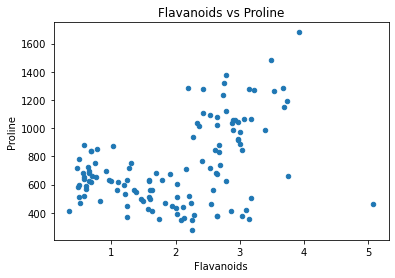

In [188]:
df.plot.scatter(x='Flavanoids', y='Proline', title='Flavanoids vs Proline')

### Homoscedasicity 

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

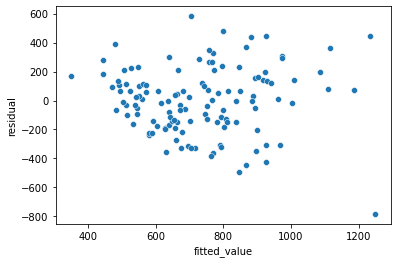

In [189]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

### Normality 

C:\Users\Digambar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


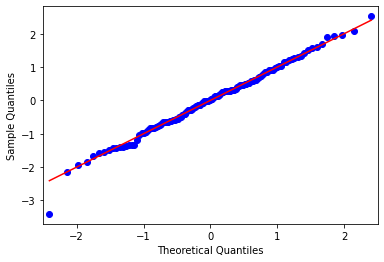

In [190]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

### Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

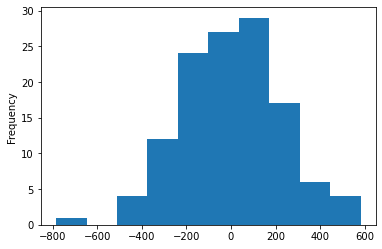

In [191]:
df['residual'].plot.hist()

### Prediction on Test Data ( Unseen Data) 

In [192]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
150,3,13.50,3.12,2.62000,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
145,3,13.16,3.57,2.15000,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
26,1,13.39,1.77,2.62000,16.1,93.0,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
108,2,12.22,1.29,2.03625,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
142,3,13.52,3.17,2.72000,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520


In [193]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Prediction
150,3,13.50,3.12,2.62000,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,876.742528
145,3,13.16,3.57,2.15000,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,463.302756
26,1,13.39,1.77,2.62000,16.1,93.0,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195,863.254531
108,2,12.22,1.29,2.03625,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312,610.112340
142,3,13.52,3.17,2.72000,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,478.805683


In [194]:
# Y = intercet + b1 * Tv + b2 * radio
Y = 153.7483 + 148.2635 * 1.57 + 57.0024 * 8.60
Y

876.7426350000001

### Test 

In [195]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Proline, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.46


### Train 

In [197]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Proline, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.37


###  Prediction for live data -- Population¶


In [198]:
d1 = {'Customer':pd.Series(['MANALI','SHIVAM','KOMAL']),
      'Pb'      :pd.Series([93.9,73.5,200]),
      'Cu'      :pd.Series([43.5,18,35]),
      'Cr'      :pd.Series([50.5,13,24]),
      'SO2'     :pd.Series([50.5,13,24])
     }
live = pd.DataFrame(d1)
live

,Customer,Pb,Cu,Cr,SO2
0,MANALI,93.9,43.5,50.5,50.5
1,SHIVAM,73.5,18.0,13.0,13.0
2,KOMAL,200.0,35.0,24.0,24.0


In [201]:
live['future Prediction']=np.round(model.predict(live),2)
live

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Flavanoids' is not defined
    Proline ~  Flavanoids + Color_intensity
               ^^^^^^^^^^